Introduction
Describing the meaning of the features given the both train & test datasets.
Variable Definition Key.

    Survival
        0= No
        1= Yes
    pclass (Ticket class)
        1=1st
        2=2nd
        3=3rd
    sex
    age
    sibsp (# of siblings / spouses aboard the Titanic)
    parch (# of parents / children aboard the Titanic)
    tickets
    fare
    cabin
    embarked Port of Embarkation.
        C = Cherbourg,
        Q = Queenstown,
        S = Southampton
    pclass: A proxy for socio-economic status (SES)
        Passenger Class.
        1st = Upper
        2nd = Middle
        3rd = Lower

In [106]:
%matplotlib inline
from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO
import warnings
warnings.filterwarnings("ignore")
# import pydotplus #pip install pydotplus

In [107]:
df = pd.read_csv('train.csv')

In [108]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
df.shape

(891, 12)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Insights

    1) Survived is the target column 
    2) PassangerId, Name ,Ticket doesnt contribute towards target column hence it will be better to drop them.
    3) cabin,Embarked column seems like having null values in it.

In [111]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [112]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [113]:
df.isnull().sum()/df.isnull().count() * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

### Null Handling
    
    - Age,Cabin and Embarked column contains missing values or null values.
    - cabin contains more than 70% missing value, we can drop that column.
    - Null valued of Age and Embarked column need to be imputed.

In [114]:
df.drop('Cabin',axis=1,inplace=True)

In [115]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [116]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [117]:
# Filling embarked column with S as it is the most repeated value.
df['Embarked'].fillna('S',inplace=True)

df['Embarked'].isnull().sum()

0

In [118]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [119]:
df.isnull().sum()/df.isnull().count() * 100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [120]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [121]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

# Univariate Analysis

### Target Column - Survived 

Text(0,0.5,'Passanger Count')

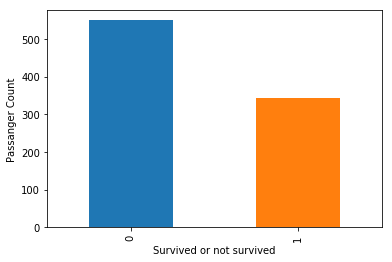

In [122]:
df['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived or not survived')
plt.ylabel('Passanger Count')

- No of people survived are less than that of unsurvived

### Age

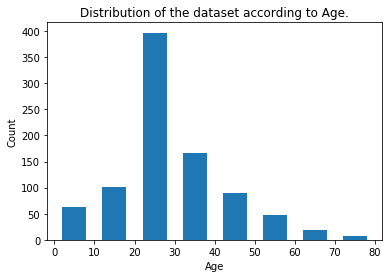

In [123]:
bins=np.arange(0,df.Age.max()+10,10)
plt.hist(df['Age'],rwidth=0.6,bins=bins)
plt.title('Distribution of the dataset according to Age.')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show();

- Most of the people are aged between 20-30
- Followed by those between 30-40

### Fare

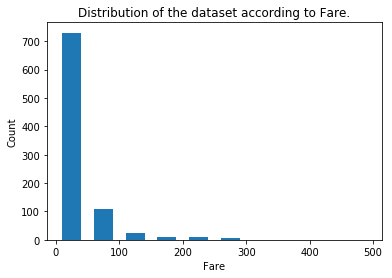

In [124]:
bins=np.arange(0,df.Fare.max()+10,50)
plt.hist(df['Fare'],rwidth=0.6,bins=bins)
plt.title('Distribution of the dataset according to Fare.')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show();

- most of the fares are between 0-50 pounds followed by 50-100 pounds

### Pclass - (Passanger Class)

Text(0,0.5,'Count')

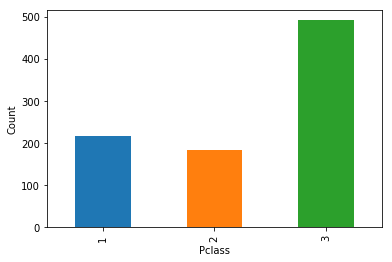

In [125]:
df['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Count')


- Majority of the passangers are from 3rd class (i.e Lower class)
- as it is evident that lower class has less fare and from the graph above we can see that 

### Sex 

Text(0,0.5,'Count')

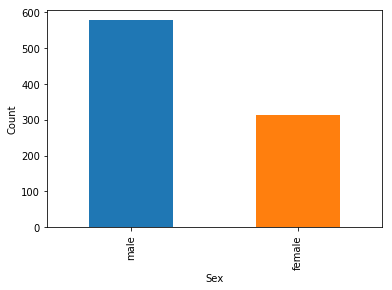

In [126]:
df['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')

- No of male passangers are more than female

### SibSp ( Sibling/Spouse of a passanger)

Text(0,0.5,'Passanger Count')

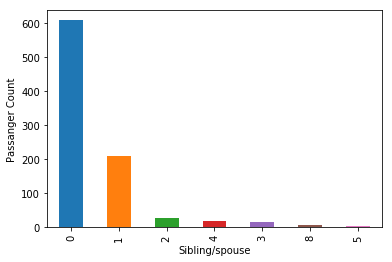

In [127]:
df['SibSp'].value_counts().plot(kind='bar')
plt.xlabel('Sibling/spouse')
plt.ylabel('Passanger Count')

- Majority of the passanger did not have siblings/spouses onboarded with them

### Parch (Parent or child with passanger)

Text(0,0.5,'Passanger Count')

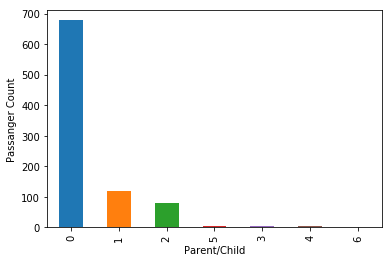

In [128]:
df['Parch'].value_counts().plot(kind='bar')
plt.xlabel('Parent/Child')
plt.ylabel('Passanger Count')

- Majority of passangers did not have their parents/childrens onboarded with them

### Embarked port (C = Cherbourg , Q = Queenstown, S = Southampton)

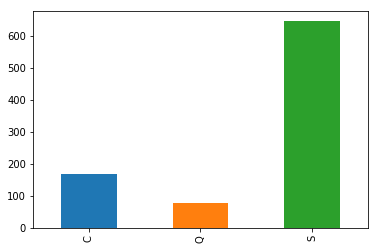

In [129]:
df['Embarked'].value_counts().sort_index().plot(kind='bar')

- Majority of the passengers were onboarded from southampton

# Bivariate Analysis

#### Age vs Survived

[ 0. 10. 20. 30. 40. 50. 60. 70. 80.]


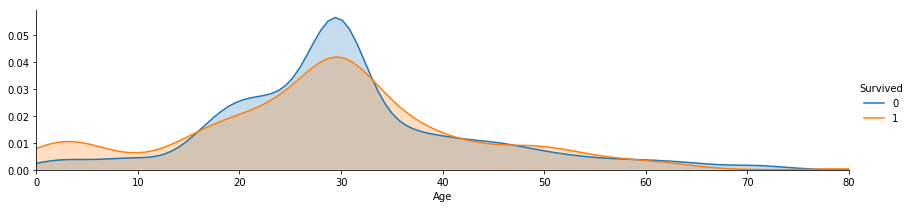

In [153]:
# # peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()


# # average survived passengers by age
# fig, axis1 = plt.subplots(1,1,figsize=(18,4))
# # average_age = df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
# bins=np.arange(0,df.Age.max()+10,10)
# sns.barplot(x='Age', y='Survived', data=bins)


#### Pclass vs Survived

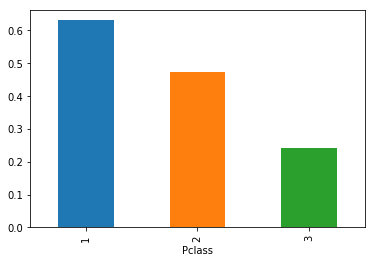

In [130]:
df[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')

- Passangers from 1st class has high chance of surviving than the other two classes
- 1 > 2 > 3

#### Sex vs Survived

Text(0,0.5,'Survival Probability')

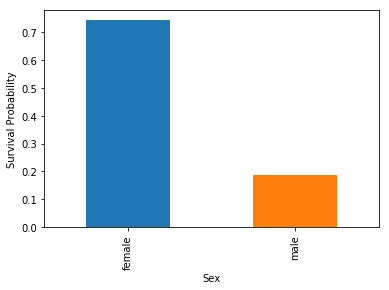

In [131]:
df[['Sex','Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survival Probability')

- we can clearly see that female has more chances of survival than male passangers

#### SibSP vs Survived

Text(0,0.5,'Survival Probability')

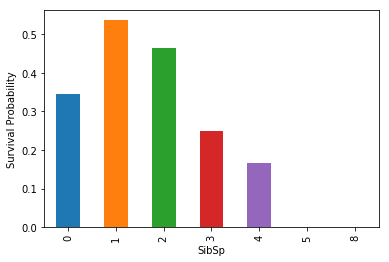

In [132]:
df[['SibSp','Survived']].groupby('SibSp').mean().Survived.plot(kind='bar')
plt.xlabel('SibSp')
plt.ylabel('Survival Probability')

- passangers having one sibling/spouse has more survival probability
- '1' > '2' >'0' >'3' >'4'

#### Parch vs Survived

Text(0,0.5,'Survival Probability')

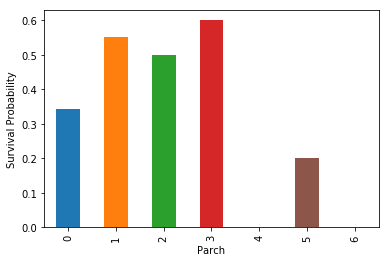

In [133]:
df[['Parch','Survived']].groupby('Parch').mean().Survived.plot(kind='bar')
plt.xlabel('Parch')
plt.ylabel('Survival Probability')

- passangers having 3 children/parents has more survival probability
- '3' > '1' > '2' > '0' > '5'

#### Embarked vs Survived

Text(0,0.5,'Survival Probability')

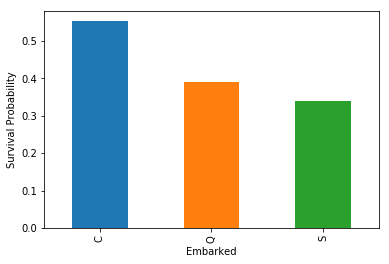

In [134]:
df[['Embarked','Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Survival Probability')

- Passangers boarded from Cherbourg has highest probability of survival 
- 'C' > 'Q' > 'S'

#### Pclass vs Sex  (1st = Upper , 2nd = Middle , 3rd = Lower)

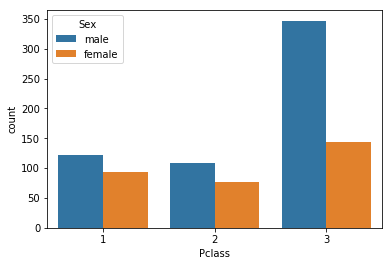

In [135]:
sns.countplot(x='Pclass',hue='Sex',data=df)

- Every class has more no of males than female 
- Lower class has majority no of male passangers than females

#### Embarked vs Sex (C = Cherbourg , Q = Queenstown, S = Southampton)

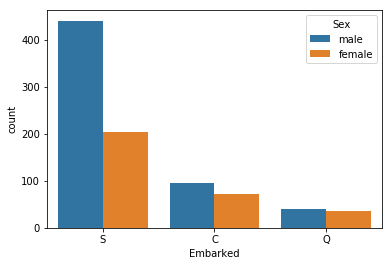

In [139]:
sns.countplot(x='Embarked',hue='Sex',data=df)

- Majority of passanger boarded from southampton are Male 

## Multivariate analysis

#### Pclass vs Sex vs Survived  (1st = Upper , 2nd = Middle , 3rd = Lower)

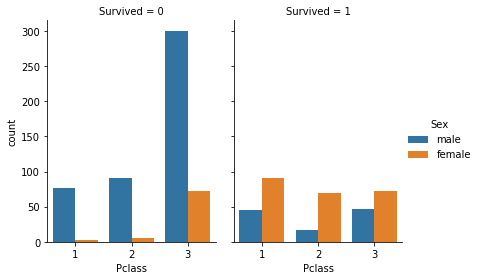

In [137]:
sns.catplot(x='Pclass',hue='Sex',col='Survived',data=df,kind='count',height=4, aspect=.7)

- Majority of passangers from lower class couldn't survive which is obvious thing to analyse as when ship will start to   sink these passengers will be drowned first
- As we saw above Females were given priority for survival
- More no of females from Upper class were survived followed by Lower and then middle class

#### Embarked vs Sex vs Survived (C = Cherbourg , Q = Queenstown, S = Southampton)

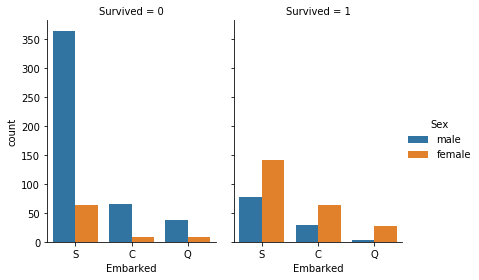

In [140]:
sns.catplot(x='Embarked',hue='Sex',col='Survived',data=df,kind='count',height=4, aspect=.7)

- Most no of Females boarded from southampton port survived
- Most no of Males boraded from southampton port could not survive